In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

dash = pd.read_csv('/home/ml/datasets/DASH60.csv',delimiter=',', parse_dates=[['Date', 'Time']])
dash.head(1)

Date_Time   Open     Max     Min   Close  Volume
0 2017-09-08 13:00:00  361.0  362.79  335.93  335.93     185

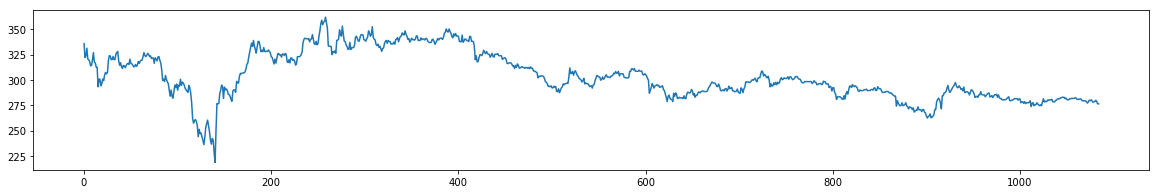

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(dash.index, dash['Close'] , label="Close")

In [4]:
def get_privot_dot(price_close, min_value,max_value):
    privot_dot = (price_close + max_value + min_value)/3
    return privot_dot  

In [5]:
def get_resistors(privot_dot,min_value,max_value):
    r1 = 2*privot_dot-min_value
    r2 = privot_dot+max_value-min_value
    r3 = 2*(privot_dot-min_value)+max_value
    result = pd.DataFrame({'R1': r1, 'R2': r2, 'R3': r3})
    return result

In [6]:
def get_supports(privot_dot,min_value,max_value):
    s1 = 2*privot_dot-max_value
    s2 = privot_dot-max_value-min_value
    s3 = min_value-(2*(max_value-privot_dot))
    result = pd.DataFrame({'S1': s1, 'S2': s2, 'S3': s3})
    return result

In [7]:
def get_bollinger_bands(price_close, window_size, num_of_std):
    rolling_mean = price_close.rolling(window=window_size,min_periods=1).mean()
    rolling_std= price_close.rolling(window=window_size,min_periods=1).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    result = pd.DataFrame({'BB_Mean': rolling_mean, 'BB_Upper': upper_band, 'BB_Lower': lower_band})
    return result

In [8]:
def get_moving_average_convergence(price_close, nslow=26, nfast=12):
    emaslow = price_close.ewm(span=nslow, min_periods=1).mean()
    emafast = price_close.ewm(span=nfast, min_periods=1).mean()
    macd = emafast-emaslow
    result = pd.DataFrame({'MACD': macd, 'EMA_26': emaslow, 'EMA_12': emafast})
    return result

In [38]:
def get_relative_stength_index(up_array, down_array,window_size=14):
    up_array[up_array < 0] = 0
    down_array[down_array > 0] = 0

    rolUp = up_array.rolling(window=window_size,min_periods=1).mean()
    rolDown = down_array.rolling(window=window_size,min_periods=1).mean().abs()
    rs = rolUp / rolDown
    avgUp = RolUp/window_size
    avgDown = RolDown/window_size
    rsi = 100*((avgUp)/(avgUp+avgDown))
    
    result = pd.DataFrame({'RSI': rsi})
    return result

In [105]:
def get_true_range(price_close, price_max, price_min):
    tr1 = price_max-dash['Min']
    tr2 = price_max-price_close.shift(-1)
    tr2 = tr2.abs()
    tr3 = price_min-price_close.shift(-1)
    tr3 = tr3.abs()

    TR = pd.DataFrame({'TR1': tr1, 'TR2': tr2, 'TR3': tr3,})
    TR = TR[['TR1', 'TR2', 'TR3']].max(axis=1)
    result = pd.DataFrame({'TR': TR}) 
    
    return result

In [107]:
def get_average_true_range(tr, window_size=14):
    rsi = tr.ewm(span=window_size, min_periods=1).mean()
    result = pd.DataFrame({'ATR': rsi})
    return result

In [55]:
def get_parabolic_stop_and_reversal():
    result = pd.DataFrame({'PSAR': None})
    return result

In [57]:
get_moving_average_convergence(dash['Close']).tail(1)

EMA_12     EMA_26      MACD
1084  278.459343  279.22259 -0.763246

In [58]:
dash['SMA14'] = dash['Close'].rolling(window=14,min_periods=1).mean()
dash['SMA30'] = dash['Close'].rolling(window=30,min_periods=1).mean()
dash['EMA14'] = dash['Close'].ewm(span=14,min_periods=1).mean()
dash['EMA30'] = dash['Close'].ewm(span=30,min_periods=1).mean()

In [59]:
num_of_std = dash['Close'].std()
get_bollinger_bands(dash['Close'],20,num_of_std).head(5)

BB_Lower   BB_Mean    BB_Upper
0         NaN  335.9300         NaN
1  101.142356  329.0450  556.947644
2  151.648753  327.3200  502.991247
3  177.269220  328.3325  479.395780
4  173.684598  326.8120  479.939402

In [60]:
min_values = dash['Min']
max_values = dash['Max']
close_values = dash['Close']
privot_dots = get_privot_dot(close_values,min_values,max_values)
dash['Privot_Dot'] = privot_dots

get_supports(privot_dots,min_values,max_values).tail(3)

S1          S2          S3
1082  278.400000 -279.600000  277.200000
1083  275.613333 -277.913333  273.133333
1084  276.500000 -276.500000  276.500000

In [61]:
get_resistors(privot_dots,min_values,max_values).tail(3)

R1          R2          R3
1082  279.600000  280.400000  280.800000
1083  278.093333  279.686667  280.573333
1084  276.500000  276.500000  276.500000

In [62]:
diff = np.ediff1d(dash[['Close']])
diff_df = pd.DataFrame([dash.Close,np.ediff1d(dash[['Close']])], dtype=float)
diff_array = diff_df.values[1]
dash['Diff'] = diff_array

In [63]:
dUp, dDown = dash['Diff'].copy(), dash['Diff'].copy()
get_relative_stength_index(dUp,dDown).head()

RSI
0   0.000000
1  11.046512
2  40.078329
3  27.394408
4  26.812227

In [106]:
get_true_range(dash['Close'], dash['Max'], dash['Min']).head()

TR
0  40.63
1  42.27
2  24.17
3  15.17
4  11.54

In [65]:
get_parabolic_stop_and_reversal().head()

ValueError: If using all scalar values, you must pass an index

In [109]:
resitor_df = get_resistors(privot_dots,min_values,max_values)
support_df = get_supports(privot_dots,min_values,max_values)
bollinger_df = get_bollinger_bands(dash['Close'],20,num_of_std)
macd_df = get_moving_average_convergence(dash['Close'])
rsi_df = get_relative_stength_index(dUp,dDown)
tr_df = get_true_range(dash['Close'], dash['Max'], dash['Min'])
atr_df = get_average_true_range(dash['TR'])

dash_raw = dash.copy()

dash = pd.concat([dash_raw, resitor_df, support_df, bollinger_df, macd_df, rsi_df,tr_df], axis=1)

In [110]:
get_average_true_range(dash['TR']).head()

ATR
0  40.630000
1  41.508571
2  34.885178
3  28.853749
4  24.336618

In [50]:
dash['Pct_Change'] = dash['Close'].pct_change()

In [51]:
dash['Direction'] = np.sign(dash['Close'].pct_change())

In [52]:
dash.head()

Date_Time    Open     Max     Min   Close  Volume     SMA14  \
0 2017-09-08 13:00:00  361.00  362.79  335.93  335.93     185  335.9300   
1 2017-09-08 14:00:00  335.93  335.93  293.66  322.16     274  329.0450   
2 2017-09-08 15:00:00  322.16  326.39  307.20  323.87     241  327.3200   
3 2017-09-08 16:00:00  324.00  335.90  324.00  331.37     137  328.3325   
4 2017-09-08 17:00:00  331.37  331.54  320.73  320.73     121  326.8120   

      SMA30       EMA14       EMA30    ...              S3    BB_Lower  \
0  335.9300  335.930000  335.930000    ...      300.116667         NaN   
1  329.0450  328.553214  328.815500    ...      256.300000  101.142356   
2  327.3200  326.764211  327.055920    ...      292.726667  151.648753   
3  328.3325  328.173251  328.244606    ...      313.046667  177.269220   
4  326.8120  326.231319  326.534851    ...      306.316667  173.684598   

    BB_Mean    BB_Upper      EMA_12      EMA_26      MACD        RSI  \
0  335.9300         NaN  335.930000  335.930000  0.000000   0.000000   
1  329.0450  556.947644  328.471250  328.780192 -0.308942  11.046512   
2  327.3200  502.991247  326.675381  327.016008 -0.340627  40.078329   
3  328.3325  479.395780  328.157289  328.233194 -0.075905  27.394408   
4  326.8120  479.939402  326.139321  326.493172 -0.353851  26.812227   

   Pct_Change  Direction  
0         NaN        NaN  
1   -0.040991       -1.0  
2    0.005308        1.0  
3    0.023157        1.0  
4   -0.032109       -1.0  

[5 rows x 27 columns]

In [38]:
dash.isnull().sum()

Date_Time     0
Open          0
Max           0
Min           0
Close         0
Volume        0
SMA14         0
SMA30         0
EMA14         0
EMA30         0
Privot_Dot    0
R1            0
R2            0
R3            0
S1            0
S2            0
S3            0
BB_Lower      1
BB_Mean       0
BB_Upper      1
EMA_12        0
EMA_26        0
MACD          0
RSI           0
Pct_Change    1
Direction     1
dtype: int64

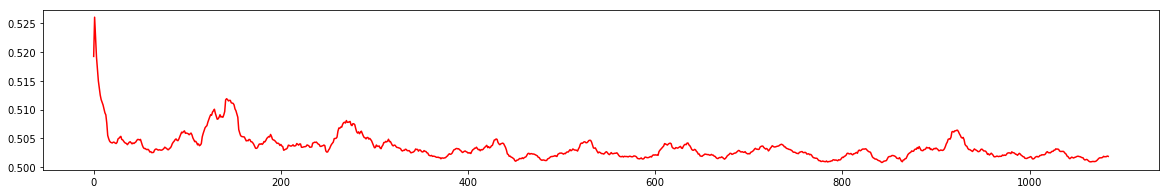

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(311)

plt.plot(dash.index, dash['RSI'] , label="SMA14", c='red')

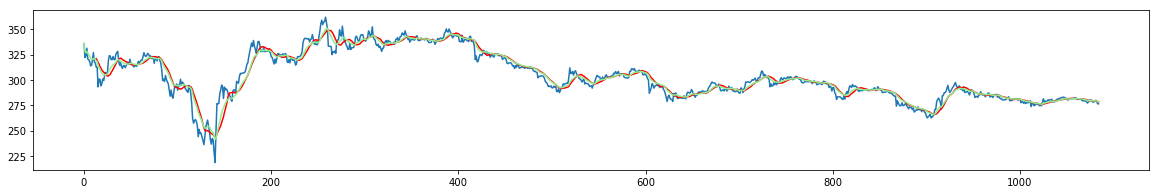

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(dash.index, dash['Close'] , label="close")
plt.plot(dash.index, dash['SMA14'] , label="SMA14", c='red')
plt.plot(dash.index, dash['EMA14'] , label="SMA30",c='lightgreen')

Index(['Date_Time', 'Open', 'Max', 'Min', 'Close', 'Volume', 'Pct_Change',
       'Direction', 'SMA14', 'SMA30', 'EMA14', 'EMA30', 'Bollinger_Mean_Band',
       'Bollinger_Upper_Band', 'Bollinger_Lower_Band', 'Privot_Dot', 'S1',
       'S2', 'S3', 'R1', 'R2', 'R3'],
      dtype='object')

In [12]:
dash.columns

Index(['Date_Time', 'Open', 'Max', 'Min', 'Close', 'Volume', 'Pct_Change',
       'Direction', 'SMA14', 'SMA30', 'EMA14', 'EMA30', 'Bollinger_Mean_Band',
       'Bollinger_Upper_Band', 'Bollinger_Lower_Band', 'Privot_Dot', 'S1',
       'S2', 'S3', 'R1', 'R2', 'R3'],
      dtype='object')

In [8]:
dash.head()

Date_Time    Open     Max     Min   Close  Volume
0 2017-09-08 13:00:00  361.00  362.79  335.93  335.93     185
1 2017-09-08 14:00:00  335.93  335.93  293.66  322.16     274
2 2017-09-08 15:00:00  322.16  326.39  307.20  323.87     241
3 2017-09-08 16:00:00  324.00  335.90  324.00  331.37     137
4 2017-09-08 17:00:00  331.37  331.54  320.73  320.73     121

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


n_train = (dash['Date_Time'].count()*0.7).astype(int)

X = dash[dash.columns]
y = dash['Direction']

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:] 

pipe = Pipeline([("scaler", StandardScaler()),("mlp",MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]))])

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'mlp__activation':['tanh', 'relu', 'logistic'],
             'mlp__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Beste Genauigkeit nach Kreuzvalidierung: {:.2f}".format(grid.best_score_))
print("Bester Score auf den Testdaten: {:.2f}".format(grid.score(X_test, y_test)))
print("Beste Parameter: {}".format(grid.best_params_))

/home/ml/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Beste Genauigkeit nach Kreuzvalidierung: 0.98
Bester Score auf den Testdaten: 0.98
Beste Parameter: {'mlp__activation': 'relu', 'mlp__alpha': 0.001}


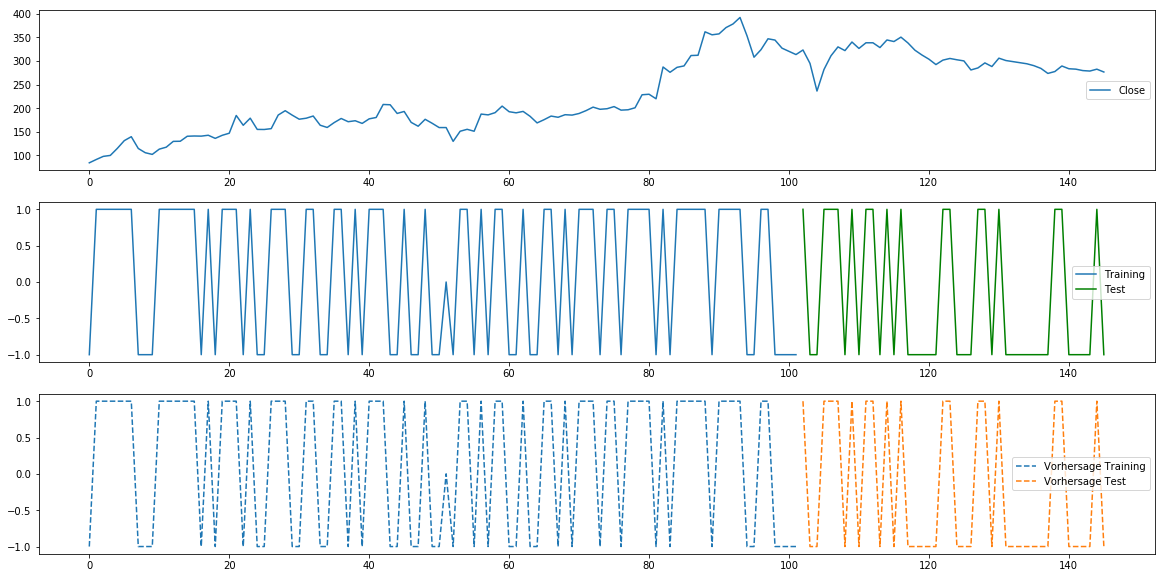

In [16]:
pipe.fit(X_test,y_test)
y_pred = pipe.predict(X_test)
pipe.fit(X_train,y_train)
y_pred_train = pipe.predict(X_train)

plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(range(0, len(y_test) + n_train), dash['Close'] , label="Close")
 
plt.legend(loc=('right'))
plt.subplot(312)
plt.plot(range(n_train), y_train, '-',label="Training")
plt.plot(range(n_train, len(y_test) + n_train), y_test, 'g-', label="Test")
plt.legend(loc=('right'))
plt.subplot(313)
plt.plot(range(n_train), y_pred_train, '--', label="Vorhersage Training")
plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="Vorhersage Test")
plt.legend(loc=('right'))

In [17]:
import time
start_date = pd.Timestamp('2017-10-27')
test_vector_down = [281.11,284.50,274.70,279.50,8830,4338.79]
test_vector_up = [129.86,140.46,129.25,140.46,1169,1711.04]

In [18]:
print(pipe.predict(test_vector_up))
print(pipe.predict(test_vector_down))

[ 1.]
[ 1.]


/home/ml/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ml/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/ml/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1)